# Smell Loss Monte Carlo Simulation

## Purpose
This project seeks to explore the health risks leading to smell loss across the U.S. population. This will be done using three datasets. The 2012 and 2014 versions of the National Health and Nutrition Examination Survey both of which include evaluation of smell and taste function, as well as data collected by the Global Consortium for Chemosensory Research on COVID-19 symptoms including smell loss and various health and lifestyle factors.

## Hypotheses
Geographic & Smoking: Areas with higher smoking levels in 2011-2012 will have higher probability smell loss in 2013-2014.

Taste & Flavor: Loss of smell will be correlated with loss of flavor but not loss of taste.

Income & Smell: Areas with higher income will have a lower probability of smell loss.

## Design
### Variables
- smoking
- age
- geography

## Results so far
Smell loss based on viral infection (COVID-19 or flu/cold) for each year

In [8]:
import matplotlib.pyplot as plt
import numpy as np

from smell_loss_simulation import run_simulation

pop_size = 1000
iterations = 100
infection_distance = 5

smell_loss_2011, population_2011 = run_simulation(pop_size, iterations, infection_distance, year=2011)

smell_loss_2014, population_2014 = run_simulation(pop_size, iterations, infection_distance, year=2014)

smell_loss_2021, population_2021 = run_simulation(pop_size, iterations, infection_distance, year=2021)



Iteration   0: Smell Loss Percentage: 10.80%
Iteration   1: Smell Loss Percentage: 28.20%
Iteration   2: Smell Loss Percentage: 29.60%
Iteration   3: Smell Loss Percentage: 29.60%
Iteration   4: Smell Loss Percentage: 29.60%
Iteration   5: Smell Loss Percentage: 29.60%
Iteration   6: Smell Loss Percentage: 29.60%
Iteration   7: Smell Loss Percentage: 29.60%
Iteration   8: Smell Loss Percentage: 29.60%
Iteration   9: Smell Loss Percentage: 29.60%
Iteration  10: Smell Loss Percentage: 29.60%
Iteration  11: Smell Loss Percentage: 29.60%
Iteration  12: Smell Loss Percentage: 29.60%
Iteration  13: Smell Loss Percentage: 29.60%
Iteration  14: Smell Loss Percentage: 29.60%
Iteration  15: Smell Loss Percentage: 29.60%
Iteration  16: Smell Loss Percentage: 29.60%
Iteration  17: Smell Loss Percentage: 29.60%
Iteration  18: Smell Loss Percentage: 29.60%
Iteration  19: Smell Loss Percentage: 29.60%
Iteration  20: Smell Loss Percentage: 29.60%
Iteration  21: Smell Loss Percentage: 29.60%
Iteration 

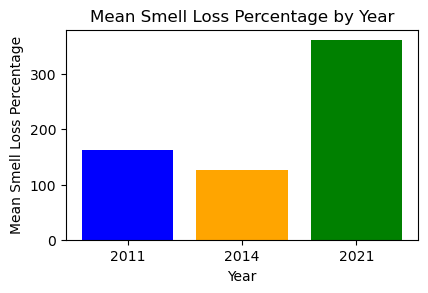

In [9]:
plt.figure(figsize=(10, 6))

plt.subplot(2, 2, 1)
plt.bar(['2011', '2014', '2021'], [np.mean(smell_loss_2011), np.mean(smell_loss_2014), np.mean(smell_loss_2021)], color=['blue', 'orange', 'green'])
plt.title('Mean Smell Loss Percentage by Year')
plt.xlabel('Year')
plt.ylabel('Mean Smell Loss Percentage')

plt.show()

Text(0, 0.5, 'Age')

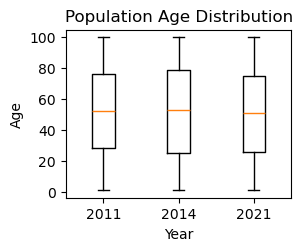

In [10]:
# Box plot for population ages
ages_2011 = [person.age for person in population_2011]
ages_2014 = [person.age for person in population_2014]
ages_2021 = [person.age for person in population_2021]

plt.subplot(2, 2, 2)
plt.boxplot([ages_2011, ages_2014, ages_2021], labels=['2011', '2014', '2021'])
plt.title('Population Age Distribution')
plt.xlabel('Year')
plt.ylabel('Age')

In [ ]:
# TODO 
# infected_2011 = [person.infected_status for person in population_2011]
# infected_2014 = [person.infected_status for person in population_2014]
# infected_2021 = [person.infected_status for person in population_2021]
# 
# plt.figure(figsize=(10, 6))
# 
# plt.subplot(2, 2, 3)
# plt.scatter(range(len(infected_2011)), infected_2011, color='blue', label='2011')
# plt.scatter(range(len(infected_2014)), infected_2014, color='orange', label='2014')
# plt.scatter(range(len(infected_2021)), infected_2021, color='green', label='2021')
# plt.title('Infected Status vs. Year')
# plt.xlabel('Person')
# plt.ylabel('Infected Status')
# plt.legend()
# 
# plt.tight_layout()
# plt.show()

In [ ]:
# TODO
# plt.subplot(2, 2, 3)
# plt.scatter(ages_2011, infected_2011, color='blue', label='2011')
# plt.scatter(ages_2014, infected_2014, color='orange', label='2014')
# plt.scatter(ages_2021, infected_2021, color='green', label='2021')
# plt.title('Infected Status vs. Age')
# plt.xlabel('Age')
# plt.ylabel('Infected Status')
# plt.legend()
# 
# plt.tight_layout()
# plt.show()